In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Imports from src
import sys
sys.path.append('/content/drive/MyDrive/fake-news-multimodal/src')

In [3]:
from dataloader.dataloader import load_dataset
from preprocessing.preprocessing_image import normalize_data, split_data, optimize_pipeline
from models.CNN.base_cnn import build_cnn
from evaluate.evaluate_cnn import evaluate_model
from train.train_cnn import train_model

Found 4000 files belonging to 2 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 1231s 10s/step - accuracy: 0.8393 - loss: 3.2845 - val_accuracy: 0.5084 - val_loss: 31.9222
Epoch 2/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 679s 8s/step - accuracy: 0.9225 - loss: 0.4539 - val_accuracy: 0.5108 - val_loss: 12.7873
Epoch 3/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 666s 8s/step - accuracy: 0.9469 - loss: 0.2192 - val_accuracy: 0.5180 - val_loss: 11.7207
Epoch 4/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 687s 8s/step - accuracy: 0.9590 - loss: 0.1550 - val_accuracy: 0.6490 - val_loss: 2.1667
Epoch 5/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 665s 8s/step - accuracy: 0.9672 - loss: 0.1360 - val_accuracy: 0.9014 - val_loss: 0.6140
Epoch 6/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 686s 8s/step - accuracy: 0.9564 - loss: 0.1247 - val_accuracy: 0.9243 - val_loss: 0.7260
Epoch 7/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 665s 8s/step - accuracy: 0.9647 - loss: 0.1333 - val_accuracy: 0.9688 - val_loss: 0.2621
Epoch 8/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 666s 8s/step - accuracy: 0.9713 - loss: 0.1313 - val_accuracy: 0.967

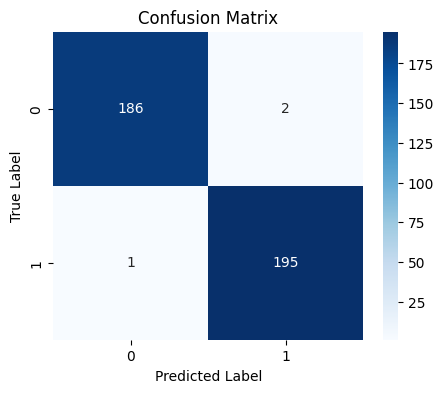

In [4]:
# 1️⃣ Load Data
main_dir = "/content/drive/MyDrive/fake-news-multimodal/data"
data = load_dataset(main_dir)

# 2️⃣ Normalize + Split + Optimize
data = normalize_data(data)
train, val, test = split_data(data)
train = optimize_pipeline(train)
val = optimize_pipeline(val)
test = optimize_pipeline(test)

# 3️⃣ Build Model
model = build_cnn()

# 4️⃣ Train
log_dir = "/content/drive/MyDrive/fake-news-multimodal/logs"
save_path = "/content/drive/MyDrive/fake-news-multimodal/models/fake_news_classification_CNN.keras"

history = train_model(model, train, val, log_dir, save_path)

# 5️⃣ Evaluate
evaluate_model(model, test)
